In [4]:
# -*- coding: utf-8 -*-
from __future__ import print_function
import cv2 as cv
import numpy as np
import argparse
import matplotlib.pyplot as plt
import time
import cv2
import math
from PIL import Image
plt.rcParams['figure.figsize'] = 15, 10

# 高斯模糊及取二值化

    GaussianBlur()函数用高斯滤波器（GaussianFilter）对图像进行平滑处理。 该函数将源图像与指定的高斯内核进行卷积，同时也支持in-place滤波。

(449, 1762, 3)


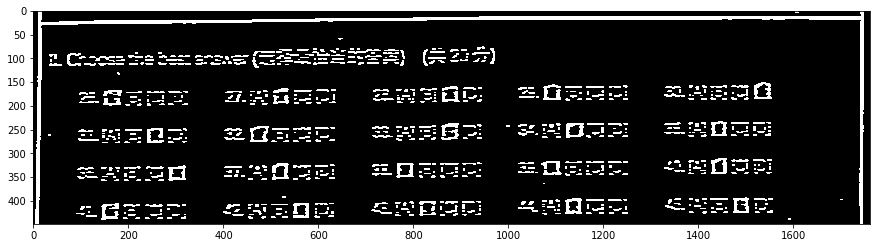

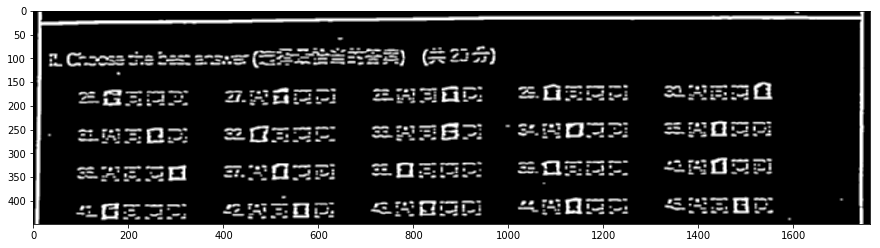

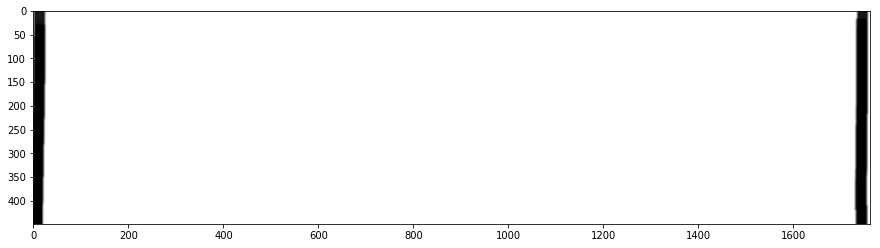

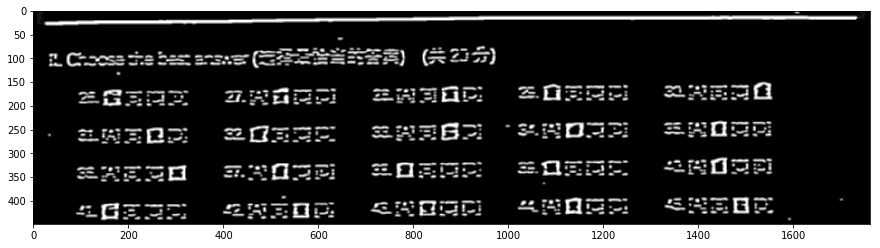

In [73]:
filename = 'd:\\clip_11.jpg'
img = cv2.imread(filename)
print(img.shape)
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(img,(21,7),0)


img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,2)
# plt.imshow(img,'gray')
# plt.show()

element = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 3))
img = cv2.erode(img, element)
# plt.imshow(img,'gray')
# plt.show()

img = cv2.dilate(img, element)
plt.imshow(img,'gray')
plt.show()

img = cv2.blur(img, tuple((5,5)))
plt.imshow(img,'gray')
plt.show()

# 去黑边
vertical = np.copy(img)
cols = vertical.shape[1]
vertical_size = int(cols / 40)
verticalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, vertical_size))
vertical = cv2.erode(vertical, verticalStructure)
vertical = cv2.dilate(vertical, verticalStructure)

vertical = cv2.blur(vertical, tuple((3, 3)))
element = cv2.getStructuringElement(cv2.MORPH_RECT, tuple((17, 17)), (-1, -1))
vertical = cv2.dilate(vertical, element, iterations=1)
vertical = cv2.bitwise_not(vertical)
plt.imshow(vertical,'gray')
plt.show()


img = cv2.bitwise_and(img,vertical)
plt.imshow(img,'gray')
plt.show()

# element = cv2.getStructuringElement(cv2.MORPH_RECT, tuple((13, 5)), (-1, -1))
# img = cv2.dilate(img, element, iterations=2)

# plt.imshow(img,'gray')
# plt.show()
